In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.optimize import curve_fit
plt.style.use('science')
import comphy.diff_eq as comphy

In [2]:
def f1(t,x):
    y = -x*t
    return y

In [3]:

a = 0 # t_initial 
b = 1# t final
h = 0.01# step size
N = int(1+ (b-a)/h)
xval = np.arange(a,b+h/2,h)
y0 = np.array([1.0])

In [4]:
y_exact = np.exp(-(xval**2)/2)

In [5]:
y_euler = comphy.call(comphy.euler,a,b,N,y0,f1)
y_mid = comphy.call(comphy.midpoint,a,b,N,y0,f1)
y_rk4 = comphy.call(comphy.rk4,a,b,N,y0,f1)

AttributeError: module 'comphy.diff_eq' has no attribute 'call'

NameError: name 'y_euler' is not defined

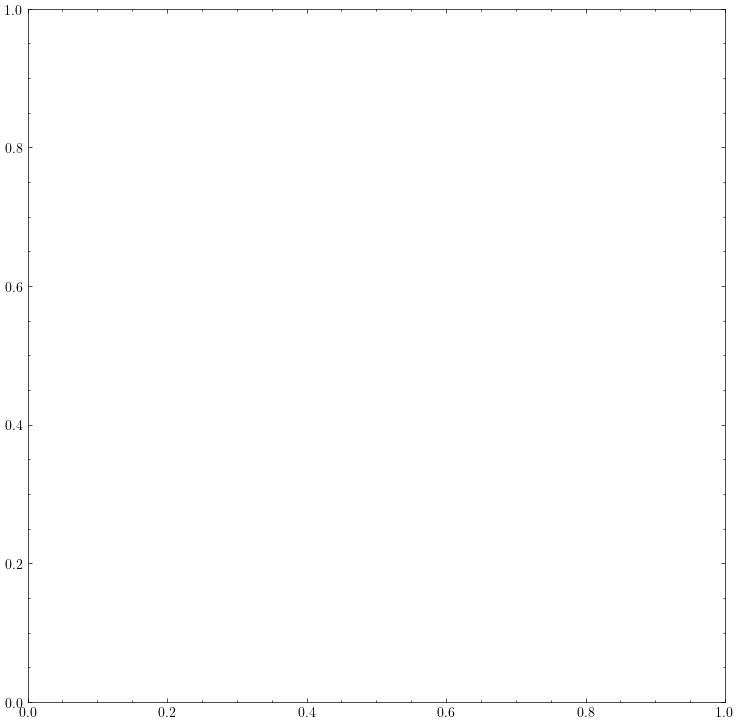

In [7]:
fig,axes = plt.subplots(1,1,figsize=(9,9), dpi=100)
axes.set_xlim([a,b])
axes.scatter(xval, y_euler, color ="black",label = "Euler Method", s=10)
axes.scatter(xval, y_mid, color= "seagreen", label = "Midpoint Method", marker= "+",s=100)
axes.scatter(xval, y_rk4, color = "red", label = "Runge-Kutta 4", marker = "d",s=20)
axes.plot(xval,y_exact, color = "cyan", label = "Exact Solution")
axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend()

In [7]:
def f2(x,y):
    f = np.array([y[1],-4*np.pi**2*y[0]])
    return f

In [8]:
h = 0.01
t0 = 0.0
t1 = 14.75

N = int(1+ (t1-t0)/h)

xs = np.arange(t0, t1+h/2, h)  # Generate range of x values

y_ini = np.asarray([1.0, 0.0])  # Initial condition

# Call the methods
ysE =   comphy.call(comphy.euler, t0,t1,N, y_ini, f=f2)
ysm =   comphy.call(comphy.midpoint, t0,t1,N,y_ini, f=f2)
ysrk4 = comphy.call(comphy.rk4, t0,t1,N,y_ini,f=f2)

In [9]:
y_ex = np.cos(2*np.pi*xs)
p_ex = -2*np.pi*np.sin(2*np.pi*xs)

In [10]:
M = 1
K = 4*np.pi**2

Ee = 0.5*(1/M)*ysE[:,1]**2 + 0.5*K*ysE[:,0]**2
Em = 0.5*(1/M)*ysm[:,1]**2 + 0.5*K*ysm[:,0]**2
Erk4 = 1/M*0.5*ysrk4[:,1]**2 + 0.5*K*ysrk4[:,0]**2 

In [1]:
fig3,axes3 = plt.subplots(1,3,figsize=(9,9*3), dpi=100)
axes3[0].scatter(xs, ysE[:,0], color ="blue",label = "Euler Method for y ", s=2)
# axes3[0].scatter(xs, ysE[:,1], color ="red",label = "Euler Method for p ", s=1)
# axes3[0].plot(xs,y_ex, color = "cyan", label = "Exact Solution for y ")
axes3[0].plot(xs,Ee, color = "seagreen", label = "Exact Solution for p ")
# axes3[0].plot(xs,p_ex, color = "seagreen", label = "Exact Solution for p ")

axes3[1].scatter(xs, ysm[:,0], color= "blue", label = "Midpoint Method for y ", marker= "+",s=5)
# axes3[1].scatter(xs, ysm[:,1], color= "red", label = "Midpoint Method for p ", marker= "+",s=10)
axes3[1].plot(xs,y_ex, color = "cyan", label = "Exact Solution for y ")
axes3[1].plot(xs,Em, color = "seagreen", label = "Energy ")
# axes3[1].plot(xs,p_ex, color = "seagreen", label = "Exact Solution for p ")

axes3[2].scatter(xs, ysrk4[:,0], color= "blue", label = "Runge Kutta Method for y ", marker= "+",s=5)
# axes3[2].scatter(xs, ysrk4[:,1], color= "red", label = "Runge Kutta Method for p ", marker= "+",s=10)
axes3[2].plot(xs,Erk4, color = "seagreen", label = "Energy ")
axes3[2].plot(xs,y_ex, color = "cyan", label = "Exact Solution")
# axes3[2].plot(xs,p_ex, color = "seagreen", label = "Exact Solution")


NameError: name 'plt' is not defined

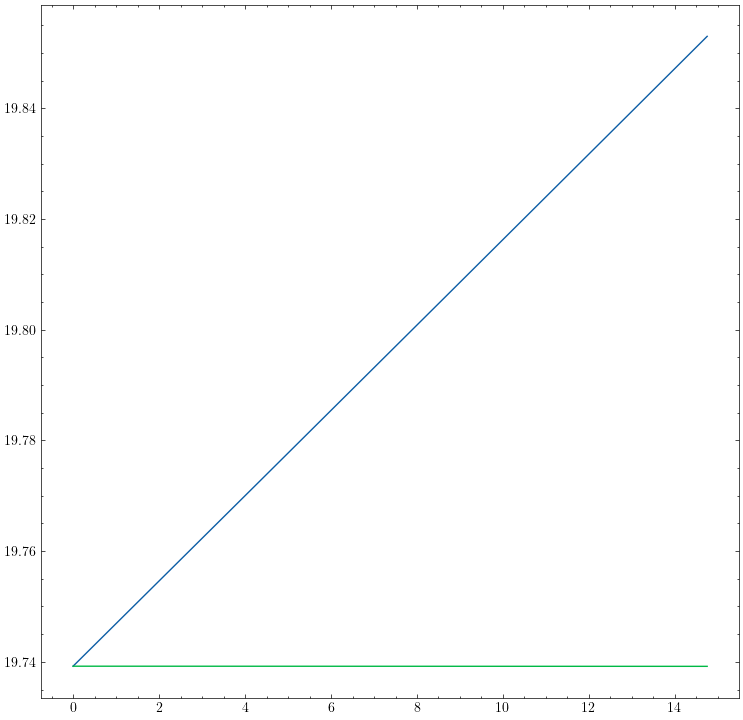

In [12]:
plt.figure(figsize=(9,9), dpi=100)
# plt.plot(xs,Ee)
plt.plot(xs,Em)
plt.plot(xs,Erk4)

In [13]:

a = 0 # t_initial 
b = 14.75# t final
h = 0.01# step size
N = int(1+ (b-a)/h)
xval = np.arange(a,b+h/2,h)
y0 = np.array([1.0])
y_ini = np.asarray([1.0, 0.0])  # Initial condition
v0 = np.array([0.0])

def f3(x,y):
    return -4*(np.pi**2)*y

In [14]:

# y_vvlt = call(euler,a,b,N,y0)
y_vlt = comphy.call_verlet(a,b,N,y0,v0, f=f3)
y_rk4 = comphy.call(comphy.rk4,a,b,N,y_ini, f=f2)
[y_vvlt, p_vvlt] = comphy.call_vvlt(comphy.vel_vlt,a,b,N,y0,v0,f3)
y_ex = np.cos(2*np.pi*xval)

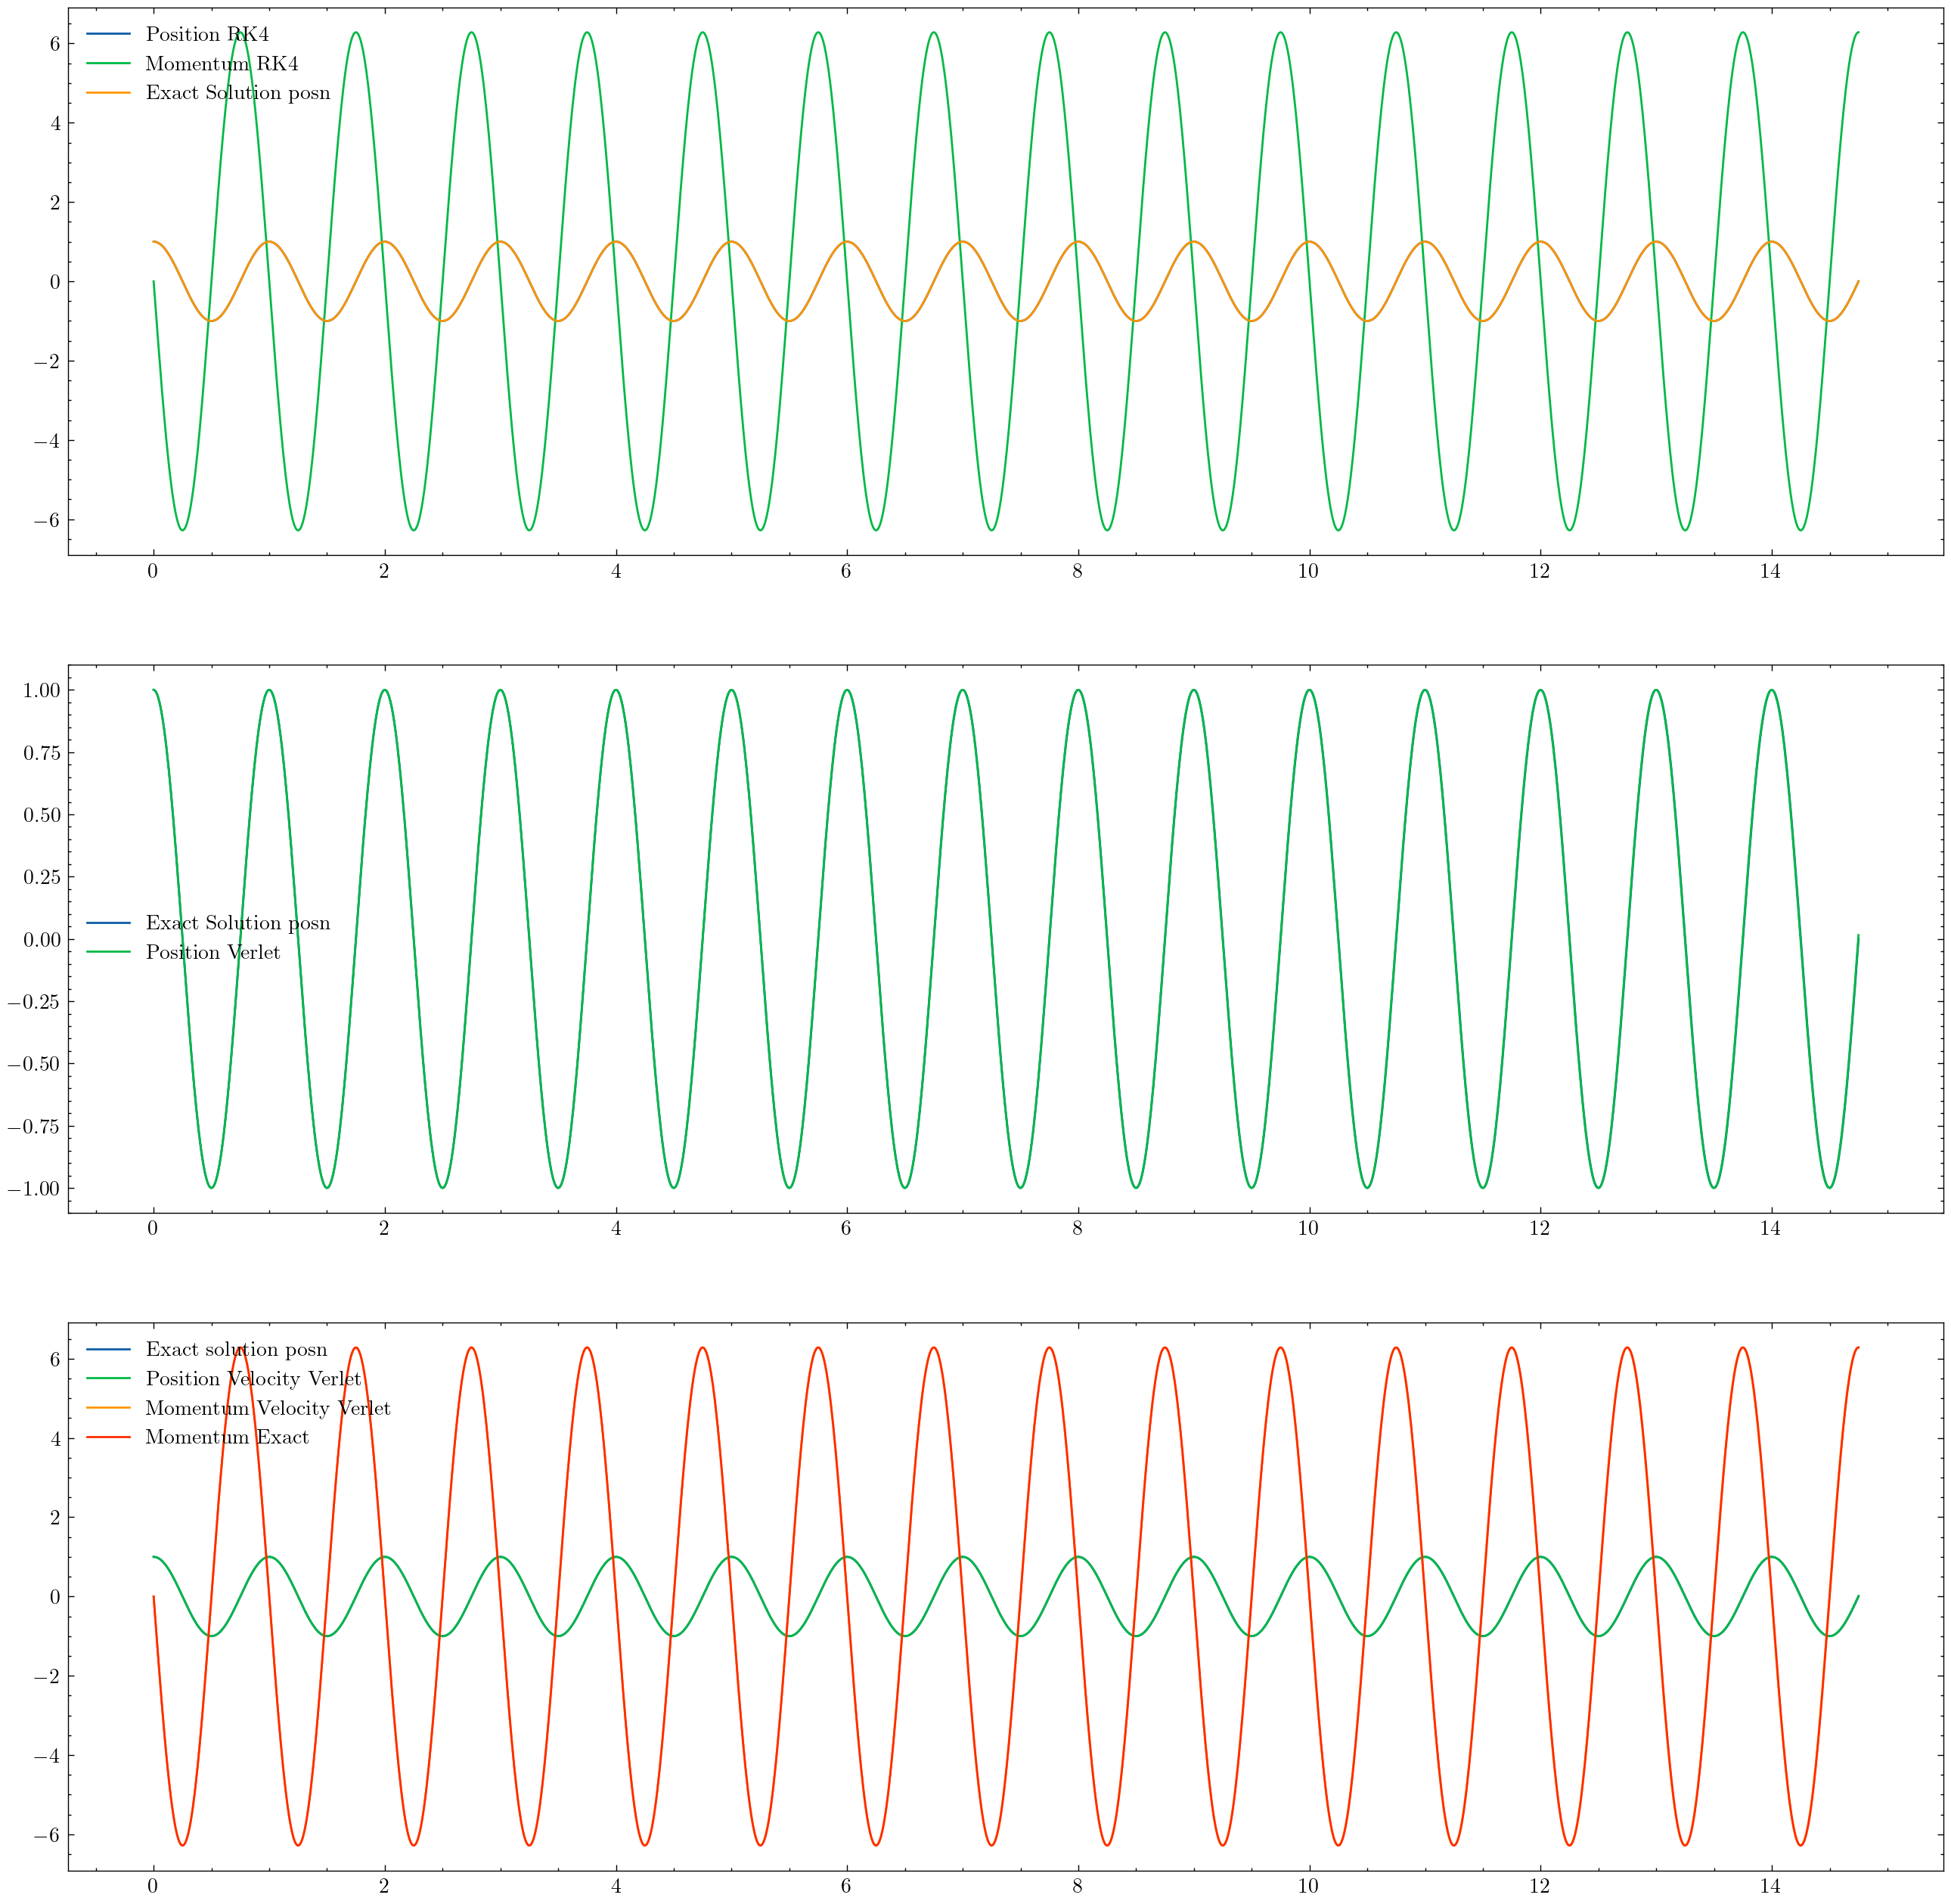

In [15]:

fig,axes = plt.subplots(3,1, figsize=(16,16), dpi =200)
axes[0].plot(xval, y_rk4[:,0], label = "Position RK4")
axes[0].plot(xval, y_rk4[:,1], label = "Momentum RK4")

axes[0].plot(xval, y_ex, label = " Exact Solution posn")
axes[1].plot(xval, y_ex, label = "Exact Solution posn")
axes[2].plot(xval, y_ex, label = "Exact solution posn")
axes[1].plot(xval, y_vlt, label = "Position Verlet")
axes[2].plot(xval, y_vvlt, label = "Position Velocity Verlet")
axes[2].plot(xval, p_vvlt, label = "Momentum Velocity Verlet")
axes[2].plot(xval, p_ex, label = "Momentum Exact")

for ax in fig.get_axes():
    ax.legend()

In [16]:
Evlt = 0.5*(1/M)*y_vlt**2 + 0.5*K*y_vlt**2
Evvlt = 0.5*(1/M)*p_vvlt**2 + 0.5*K*y_vvlt**2
E_rk4 = 0.5*(1/M)*y_rk4[:,1]**2 + 0.5*K*y_rk4[:,0]**2

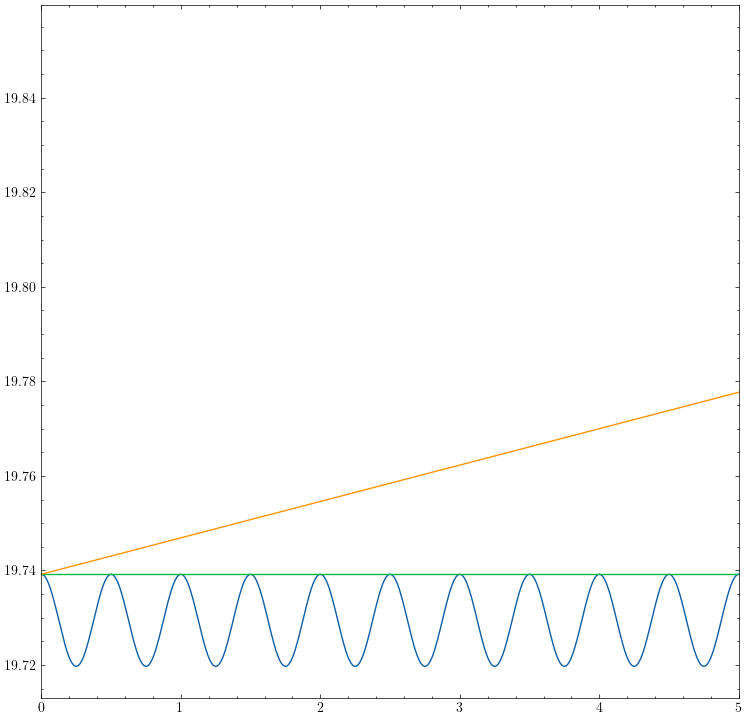

In [18]:
plt.figure(figsize=(9,9), dpi=100)
# plt.plot(xval,Evlt)
# plt.plot(xs,(Evvlt-Eavg2))
plt.plot(xs, Evvlt)
plt.plot(xs, E_rk4)
# plt.plot(xs,cosine*(0.01))
plt.xlim([0,5])
# plt.vlines(1,19.72,19.74, color = "red")

# plt.vlines(1+omg_v*h,19.72,19.
#74, color = "red")
plt.plot(xs, Em)

In [84]:
EE = max(Evvlt)
Eex = 2*np.pi**2
cosine = np.cos(2*omg_v*xs)
Eavg = Eex *(1-np.pi**2*h**2)
Eavg

19.719726983971917

In [87]:
omg_v = (1/h)*np.arccos(1-2*np.pi**2*h**2)
Eavg2 = np.average(Evvlt)
Eavg2, omg_v

(np.float64(19.729466295289562), np.float64(6.284219309034957))

In [100]:
osc = (((4*np.pi**2)**2)*(h**2))/4
osexp = max(Evvlt)-min(Evvlt)
osc, 2*osexp

(0.038963636413600976, array([0.03896363]))